In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

plt.rcParams['figure.figsize'] = 16, 12 

np.random.seed(42)
#from tensorflow import set_random_seed
#set_random_seed(42)

### Generate Dataset

In [2]:
def dataset_10(n_points, random=False):
    
    dataset = []
    if random:
        
        for i in range(n_points**2):
            
            i, j = np.random.uniform(-1, 1, 1)[0], np.random.uniform(-1, 1, 1)[0]
            
            if (((i)**2 + (j+1)**2 <= 1) and ((i+1)**2 + (j)**2 <= 1) or 
                (((i+1)**2 + (j)**2 <= 1) and ((i)**2 + (j-1)**2 <= 1)) or 
                (((i)**2 + (j-1)**2 <= 1) and ((i-1)**2 + (j)**2 <= 1)) or
                (((i-1)**2 + (j)**2 <= 1) and ((i)**2 + (j+1)**2 <= 1))):
                dataset.append([i, j, 1]) #classe 1
            else:
                dataset.append([i, j, 0]) #classe 0
    else:
                        
        x = np.linspace(-1, 1, n_points)
        xx, yy = np.meshgrid(x, x)    
        x_lin, y_lin = xx.ravel(), yy.ravel()
    
        for i, j in zip(x_lin, y_lin):
        
            if (((i)**2 + (j+1)**2 <= 1) and ((i+1)**2 + (j)**2 <= 1) or 
                (((i+1)**2 + (j)**2 <= 1) and ((i)**2 + (j-1)**2 <= 1)) or 
                (((i)**2 + (j-1)**2 <= 1) and ((i-1)**2 + (j)**2 <= 1)) or
                (((i-1)**2 + (j)**2 <= 1) and ((i)**2 + (j+1)**2 <= 1))):
                dataset.append([i, j, 1]) #classe 1
            else:
                dataset.append([i, j, 0]) #classe 0
    
    return np.array(dataset)    

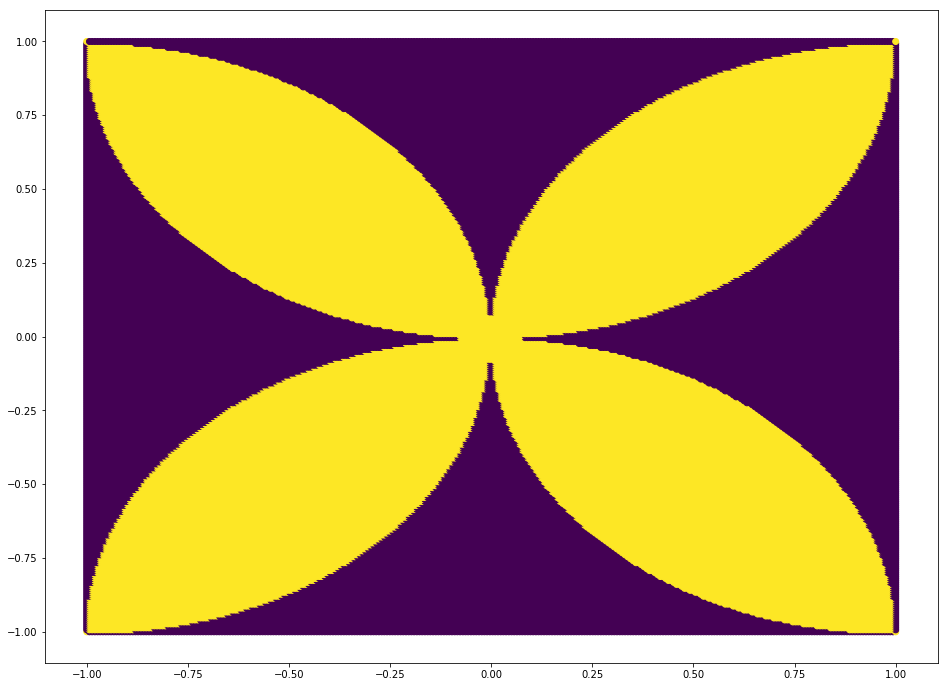

In [23]:
dt = dataset_10(300)
plt.scatter(dt[:,0], dt[:, 1], c=dt[:,2])
plt.savefig("fig_10_original.png", dpi=320)
plt.show()


In [24]:
from keras import models, layers


n_epochs = 20
#train_all_data 
x_train, y_train = dt[:,:2], dt[:,2]

#model building 
model_one = models.Sequential()
model_one.add(layers.Dense(16, activation='relu', input_shape=(x_train.shape[1],)))
model_one.add(layers.Dense(16, activation='relu'))
model_one.add(layers.Dense(1, activation='sigmoid'))

model_one.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

print("Fitting")
history = model_one.fit(x_train, y_train, epochs=n_epochs, batch_size=16, verbose=0)
print("Finished")


Fitting
Finished


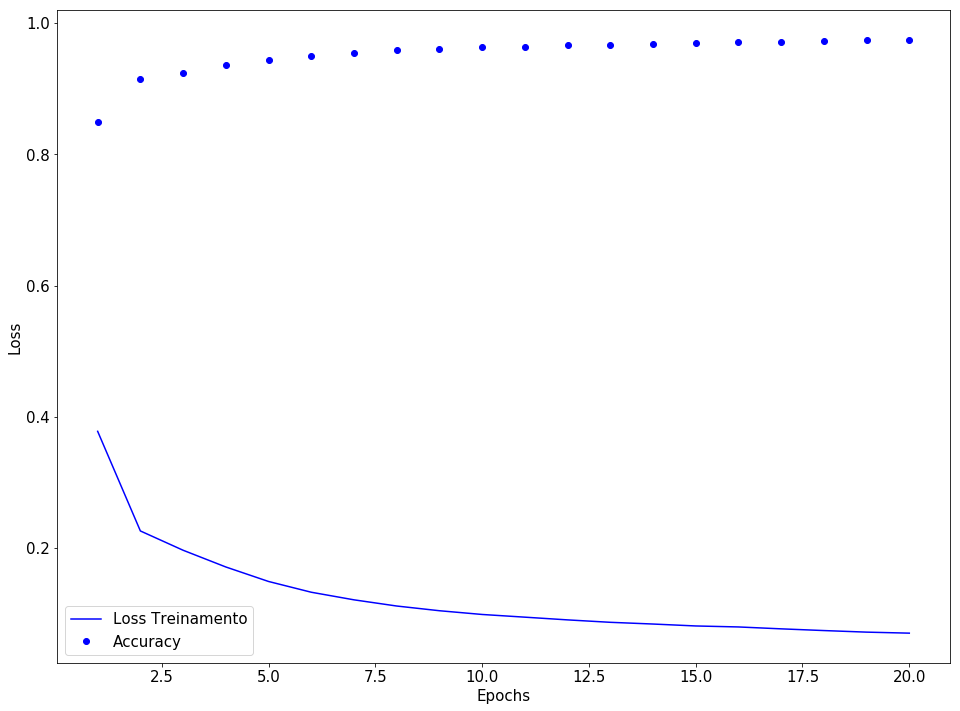

In [25]:
#print loss per epoch
loss = history.history['loss']
acc = history.history['acc']

epochs = range(1, len(loss)+1)

#fig, (ax1, ax2) = plt.subplots(2,1)
fig, ax1 = plt.subplots()

ax1.plot(epochs, loss, 'b-', label='Loss Treinamento')
ax1.plot(epochs, acc, 'bo', label='Accuracy')
ax1.set_xlabel('Epochs', fontsize=15)
ax1.set_ylabel('Loss', fontsize=15)
ax1.tick_params(axis='both', labelsize=15) 
ax1.legend(prop={'size': 15})

plt.savefig("fig_10_curvas.png", dpi=320)

plt.show()

In [26]:
from sklearn.metrics import accuracy_score

test_dt = dataset_10(30, random=True)

grid = model_one.predict(dt[:,:2])
pred = model_one.predict(test_dt[:,:2])

grid = np.around(grid).astype('int')
pred = np.around(pred).astype('int')
pred.shape = (len(pred),)
print(accuracy_score(pred, test_dt[:,2]))


0.9722222222222222


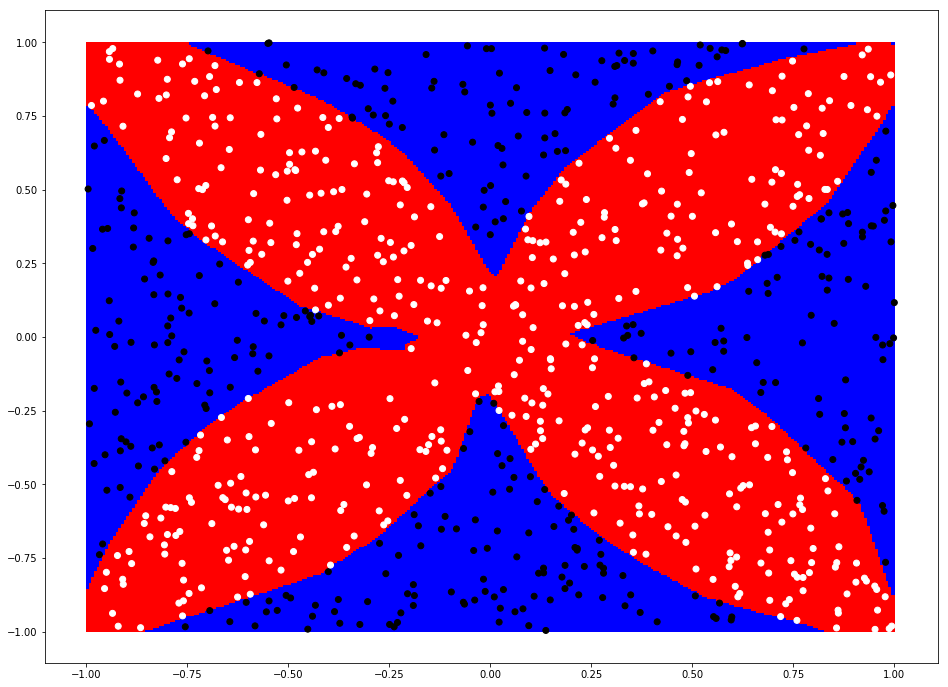

In [27]:
dimen_grid = int(np.sqrt(len(grid)))

plt.pcolor(dt[:,0].reshape(dimen_grid, -1), dt[:,1].reshape(dimen_grid, -1), grid.reshape(dimen_grid, -1), cmap='bwr')
plt.scatter(test_dt[:,0], test_dt[:,1], c=['w' if i==1 else 'k' for i in pred], label="Conjunto de Teste")

plt.savefig("fig_10_predict_rede.png")
plt.show()

### Confunsion Matrix

In [32]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred).astype(int)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    #ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black", fontweight='bold', fontsize=15)
    
    ax.tick_params(axis='both', labelsize=15)
    ax.set_xlabel('Predicted label', fontsize=15)
    ax.set_ylabel('True label', fontsize=15)
    ax.set_title(title, fontsize=15)
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[364   5]
 [ 20 511]]


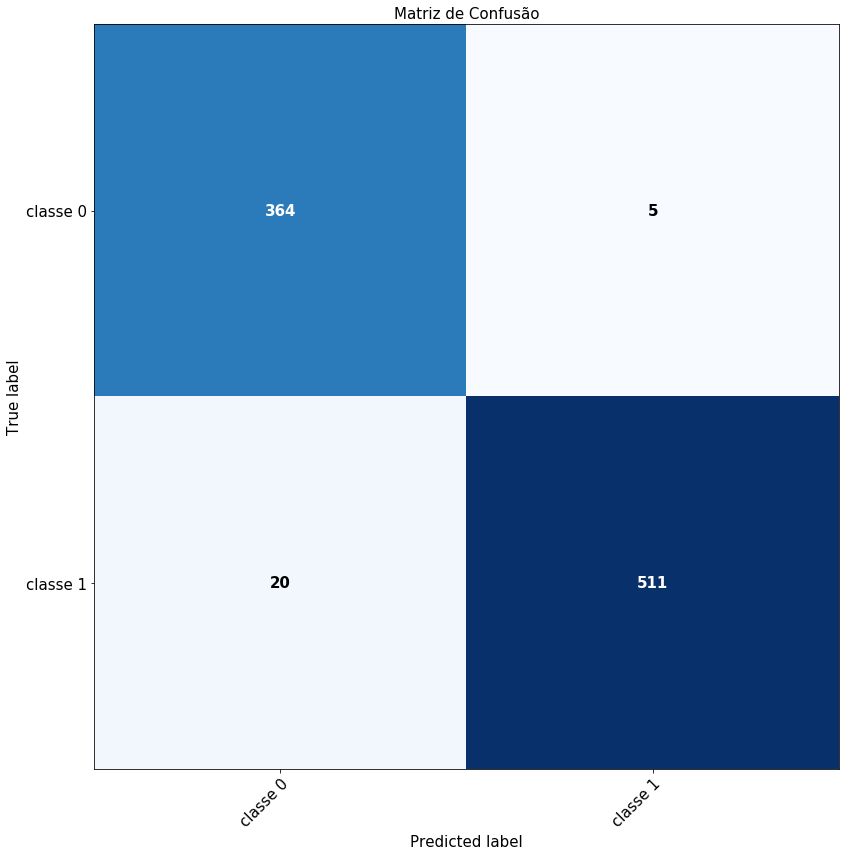

In [33]:
plot_confusion_matrix(test_dt[:,2], pred, classes=np.array(['classe 0', 'classe 1']), title='Matriz de Confusão')
plt.savefig("fig_10_confMatrix_rede.png", dpi=320)
plt.show()

### Usando  SVM

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
#nao rodar mais. So para saber melhor parametros 
parameters = {'kernel':['rbf'], 'C':[1, 10, 100]}
svc = SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(x_train, y_train)

In [ ]:
clf.best_estimator_

In [31]:
clf = SVC(kernel='rbf', C=1)
print("fitting...")
clf.fit(x_train, y_train)
print("finished")

print("predicting")
grid2 = clf.predict(dt[:,:2])
pred2 = clf.predict(test_dt[:,:2])

grid2 = np.around(grid2).astype('int')
pred2 = np.around(pred2).astype('int')
pred2.shape = (len(pred2),)

print(accuracy_score(pred2, test_dt[:,2]))

fitting...
finished
predicting
0.8966666666666666


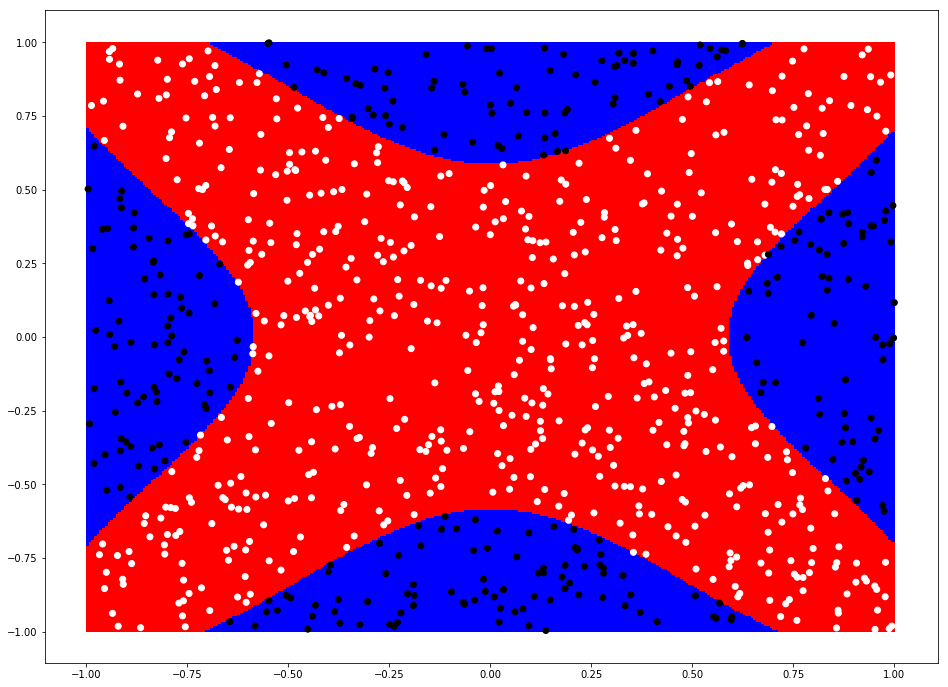

In [34]:
plt.pcolor(dt[:,0].reshape(dimen_grid, -1), dt[:,1].reshape(dimen_grid, -1), grid2.reshape(dimen_grid, -1), cmap='bwr')
plt.scatter(test_dt[:,0], test_dt[:,1], c=['w' if i==1 else 'k' for i in pred2])
plt.savefig("fig_10_svm_pred.png")
plt.show()

Confusion matrix, without normalization
[[292  77]
 [ 16 515]]


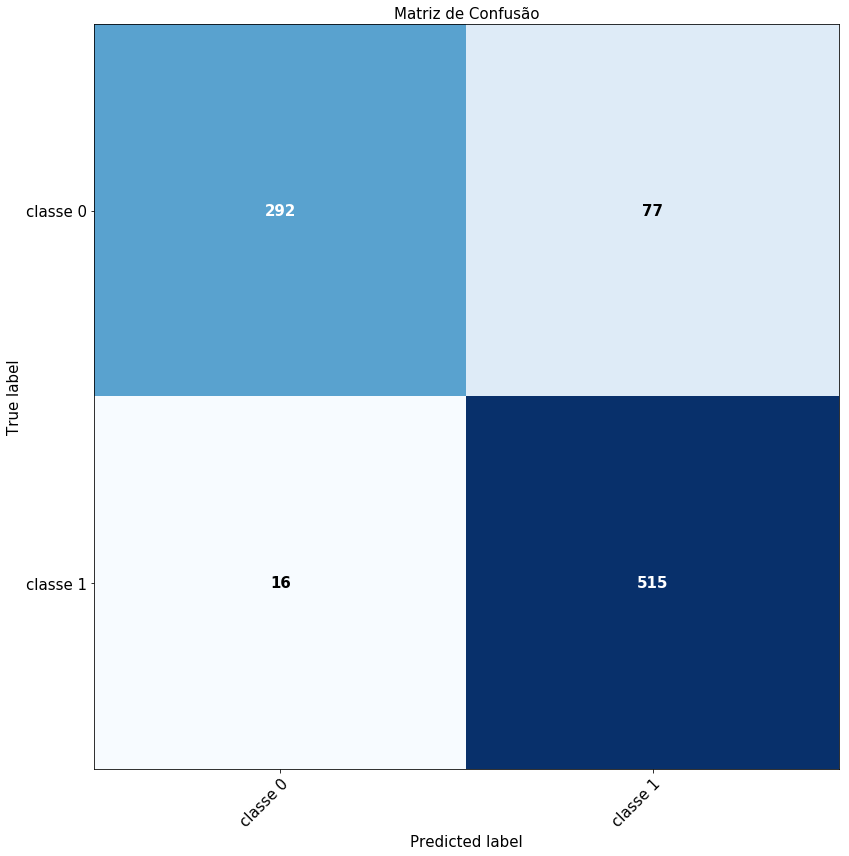

In [35]:
plot_confusion_matrix(test_dt[:,2], pred2, classes=np.array(['classe 0', 'classe 1']), title='Matriz de Confusão')
plt.savefig("fig_10_confMatrix_svm.png", dpi=320)
plt.show()